In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import zipfile

# Ukol 1: nacteni dat ze ZIP souboru
def load_data(filename : str) -> pd.DataFrame:
    # tyto konstanty nemente, pomuzou vam pri nacitani
    headers = ["p1", "p36", "p37", "p2a", "weekday(p2a)", "p2b", "p6", "p7", "p8", "p9", "p10", "p11", "p12", "p13a",
                "p13b", "p13c", "p14", "p15", "p16", "p17", "p18", "p19", "p20", "p21", "p22", "p23", "p24", "p27", "p28",
                "p34", "p35", "p39", "p44", "p45a", "p47", "p48a", "p49", "p50a", "p50b", "p51", "p52", "p53", "p55a",
                "p57", "p58", "a", "b", "d", "e", "f", "g", "h", "i", "j", "k", "l", "n", "o", "p", "q", "r", "s", "t", "p5a"]

    #def get_dataframe(filename: str, verbose: bool = False) -> pd.DataFrame:
    regions = {
        "PHA": "00",
        "STC": "01",
        "JHC": "02",
        "PLK": "03",
        "ULK": "04",
        "HKK": "05",
        "JHM": "06",
        "MSK": "07",
        "OLK": "14",
        "ZLK": "15",
        "VYS": "16",
        "PAK": "17",
        "LBK": "18",
        "KVK": "19",
    }

    frame_list = []
    with zipfile.ZipFile(filename, 'r') as root_zip:
        for zip_file in root_zip.filelist:
            with zipfile.ZipFile(root_zip.open(zip_file)) as zip:
                for reg_name, reg_code in regions.items():
                    df = pd.read_csv(zip.open(f'{reg_code}.csv'), encoding="cp1250", sep=";", quotechar='"', decimal=",", low_memory=False, names=headers)
                    df["region"] = reg_name
                    frame_list.append(df)

    return pd.concat(frame_list, axis=0)

In [2]:
# Ukol 2: zpracovani dat
def parse_data(df : pd.DataFrame, verbose : bool = False) -> pd.DataFrame:
    df2 = df.copy()
    
    df2 = df2.drop_duplicates(subset="p1", keep="first")
    to_convert = [x for x in df2 if x not in ["p1", "p2a", "p13a", "p13b", "p13c", "p14", "p34", "p37", "p53", "region", "d", "e"]]
    df2[to_convert] = df2[to_convert].astype("category")
    for col in ["d", "e"]:
        df2[col] = pd.to_numeric(df2[col], errors="coerce")
    
    df2["date"] = pd.to_datetime(df2["p2a"]).astype('datetime64[ns]')
    
    if verbose:
        print(f'orig_size={df.memory_usage(deep=True).sum() / 1_000_000} MB')
        print(f'new_size={df2.memory_usage(deep=True).sum() / 1_000_000} MB')

    return df2

In [3]:
df = load_data("data/data.zip")
df

,p1,p36,p37,p2a,weekday(p2a),p2b,p6,p7,p8,p9,...,l,n,o,p,q,r,s,t,p5a,region
0,2100160001,4,NaN,2016-01-01,5,55,1,1,0,2,...,NaN,711403.0,NaN,Souhlasnýsesměremúseku,Pomalý,554782.0,451622.0,GN_V0.1UIR-ADR_410,1,PHA
1,2100160002,4,NaN,2016-01-01,5,130,1,3,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
2,2100160003,5,NaN,2016-01-01,5,100,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
3,2100160004,6,NaN,2016-01-01,5,120,9,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
4,2100160005,6,NaN,2016-01-01,5,2560,2,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,190906210729,2,606.0,2021-12-27,1,1040,9,0,0,2,...,606,1760003.0,NaN,Opačnýkesměruúseku,Pomalý,560294.0,NaN,GN_V0.1UIR-ADR_410,2,KVK
2462,190906210730,6,NaN,2021-12-28,2,905,2,0,0,2,...,NaN,798429.0,NaN,Souhlasnýsesměremúseku,Pomalý,560499.0,552101.0,GN_V0.1UIR-ADR_410,1,KVK
2463,190906210731,6,NaN,2021-12-30,4,350,3,0,3,2,...,NaN,734801.0,NaN,Opačnýkesměruúseku,Pomalý,560286.0,553824.0,GN_V0.1UIR-ADR_410,1,KVK
2464,190906210732,6,NaN,2021-12-30,4,1035,2,0,0,2,...,NaN,1459025.0,NaN,Opačnýkesměruúseku,Pomalý,560286.0,553476.0,GN_V0.1UIR-ADR_410,1,KVK


In [4]:
df2 = parse_data(df, verbose=True)
df2

orig_size=814.85093 MB
new_size=326.698752 MB


,p1,p36,p37,p2a,weekday(p2a),p2b,p6,p7,p8,p9,...,n,o,p,q,r,s,t,p5a,region,date
0,2100160001,4,NaN,2016-01-01,5,55,1,1,0,2,...,711403.0,NaN,Souhlasnýsesměremúseku,Pomalý,554782.0,451622.0,GN_V0.1UIR-ADR_410,1,PHA,2016-01-01
1,2100160002,4,NaN,2016-01-01,5,130,1,3,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA,2016-01-01
2,2100160003,5,NaN,2016-01-01,5,100,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA,2016-01-01
3,2100160004,6,NaN,2016-01-01,5,120,9,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA,2016-01-01
4,2100160005,6,NaN,2016-01-01,5,2560,2,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,190906210729,2,606.0,2021-12-27,1,1040,9,0,0,2,...,1760003.0,NaN,Opačnýkesměruúseku,Pomalý,560294.0,NaN,GN_V0.1UIR-ADR_410,2,KVK,2021-12-27
2462,190906210730,6,NaN,2021-12-28,2,905,2,0,0,2,...,798429.0,NaN,Souhlasnýsesměremúseku,Pomalý,560499.0,552101.0,GN_V0.1UIR-ADR_410,1,KVK,2021-12-28
2463,190906210731,6,NaN,2021-12-30,4,350,3,0,3,2,...,734801.0,NaN,Opačnýkesměruúseku,Pomalý,560286.0,553824.0,GN_V0.1UIR-ADR_410,1,KVK,2021-12-30
2464,190906210732,6,NaN,2021-12-30,4,1035,2,0,0,2,...,1459025.0,NaN,Opačnýkesměruúseku,Pomalý,560286.0,553476.0,GN_V0.1UIR-ADR_410,1,KVK,2021-12-30


In [28]:
# Ukol 3: počty nehod v jednotlivých regionech podle viditelnosti
def plot_visibility(df: pd.DataFrame, fig_location: str = None,
                    show_figure: bool = False):
       
    def replace_conditions(row):
        if row["p19"] == 1:
            return "ve dne - nezhoršená"
        elif row["p19"] == 2 or row["p19"] == 3:
            return "ve dne - zhoršená"
        elif row["p19"] == 4 or row["p19"] == 6:
            return "v noci - nezhoršená"
        elif row["p19"] == 5 or row["p19"] == 7:
            return "v noci - zhoršená"

    regions = ["JHC", "PHA", "PLK", "STC"]
    df2 = df.copy()
    df2 = df2[df2["region"].isin(regions)]
    df2["p19"] = df2.apply(lambda row: replace_conditions(row), axis=1)
    df2["sum_helper"] = 1
    stats = df2.groupby(["p19", "region"]).agg({"sum_helper": "sum"}).reset_index()

    sns.set_style("darkgrid")
    g = sns.catplot(data=stats, x="region", y="sum_helper",
                    col="p19", col_wrap=2, hue="region",
                    sharex=False, sharey=False,
                    height=3.5, aspect=1.15, legend=False,
                    kind="bar", dodge=False)

   
    # Plotting value over bar taken from https://stackoverflow.com/a/67594395
    # iterate through axes
    for ax in g.axes.ravel():
        # add annotations
        for c in ax.containers:
            labels = [f'{v.get_height():.0f}' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge')
        ax.margins(y=0.2)

    plt.suptitle("Počet nehod dle viditelnosti ve vybraných krajích")
    g.set_xlabels("Kraj")
    g.set_ylabels("Počet nehod")
    g.set_titles("Viditelnost: {col_name}")
    g.tight_layout()

    if show_figure:
        plt.show()

    if fig_location:
        plt.savefig(fig_location, bbox_inches="tight", pad_inches=0.5)

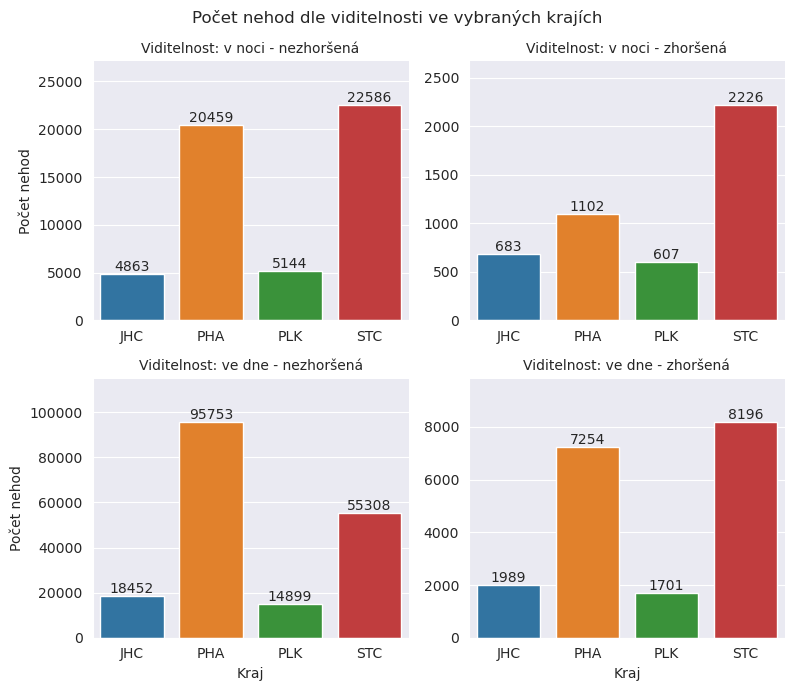

In [29]:
plot_visibility(df2, "01_visibility.png", False)

In [110]:
# Ukol4: druh srážky jedoucích vozidel
def plot_direction(df: pd.DataFrame, fig_location: str = None,
                   show_figure: bool = False):
    
    def replace_crash_type(row):
        if row["p7"] == 1:
            return "čelní"
        elif row["p7"] == 2 or row["p7"] == 3:
            return "boční"
        elif row["p7"] == 4:
            return "zezadu"

    regions = ["OLK", "PAK", "VYS", "ZLK"]
    df2 = df.copy()
    df2 = df2[df2["region"].isin(regions) & (df["p7"] != 0)]
    df2["p7"] = df2.apply(lambda row: replace_crash_type(row), axis=1)
    df2["sum_helper"] = 1

    data = df2.groupby(["region", df2["date"].dt.month, "p7"]).agg({"sum_helper": "sum"}).reset_index()

    sns.set_style("darkgrid")
    g = sns.catplot(data=data, x="date", y="sum_helper",
                    col="region", col_wrap=2, hue="p7",
                    sharex=False, sharey=False,
                    legend=True, legend_out=True,
                    height=3.5, aspect=1.15,
                    kind="bar")

    plt.suptitle("Druh srážek v jednotlivých měsících ve vybraných krajích")
    g.set_xlabels("Měsíc")
    g.set_ylabels("Počet nehod")
    g.set_titles("Kraj: {col_name}")
    g.legend.set(title="Druh srážky", alignment="left")
    g.tight_layout()

    if show_figure:
        plt.show()

    if fig_location:
        plt.savefig(fig_location, bbox_inches="tight", pad_inches=0.5)
    

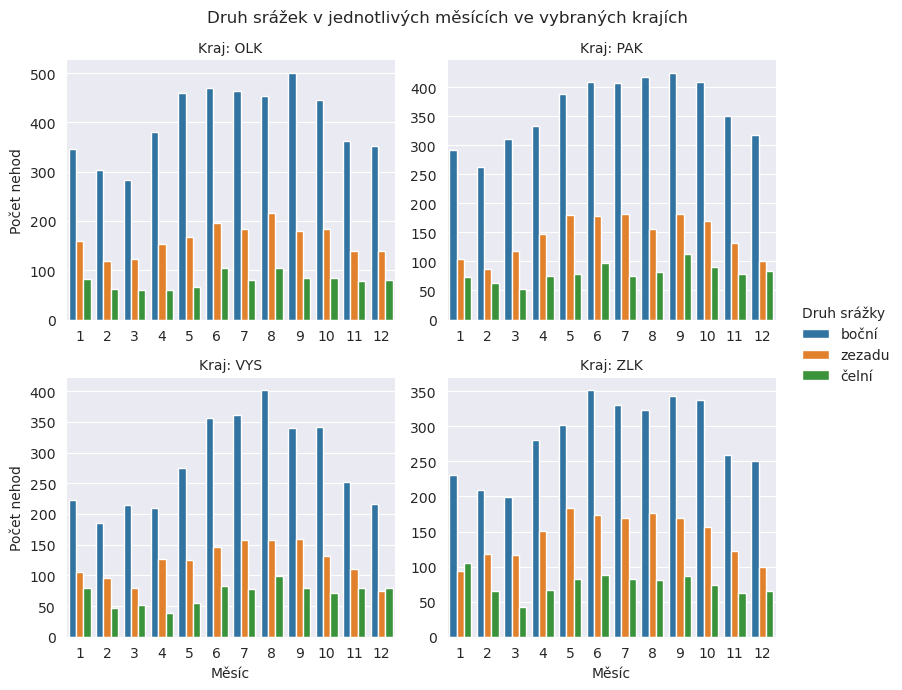

<Figure size 640x480 with 0 Axes>

In [109]:
plot_direction(df2, "02_direction.png", True)

In [8]:
# Ukol 5: Následky v čase
def plot_consequences(df: pd.DataFrame, fig_location: str = None,
                    show_figure: bool = False):
    pass